In [1]:
import pandas_datareader as pdr
import joypy
import pandas as pd
import datetime
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

In [4]:
ticker_list = ['SP500']
df = pdr.DataReader(ticker_list,
                   'fred',
                   start_date,
                   end_date)

In [5]:
df.to_csv('SP500_' + str(start_date.date()) + "_"
         + str(end_date.date()) + '.csv')
df.to_pickle('SP500_' + str(start_date.date()) + "_"
         + str(end_date.date()) + '.pkl')

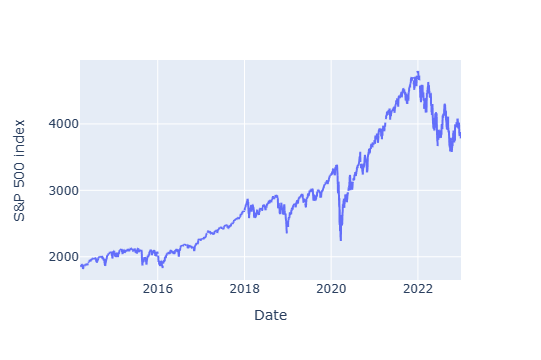

In [11]:
fig = px.line(df)
fig.update_layout(xaxis_title='Date',
                 yaxis_title='S&P 500 index',
                 legend_title='Curve',
                 showlegend=False)
fig.show()

Percentage of missing data
3.442%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_54924\213010186.py:3: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



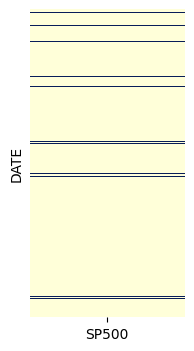

In [12]:
percentag_missing = df.isnull().sum()*100/len(df)
print('Percentage of missing data')
print('%.3f%%' % (percentag_missing))

fig, ax = plt.subplots(figsize=(2,4))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu', yticklabels=[])
plt.show()

Percentage of missing data
0.000%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_54924\3223629666.py:4: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



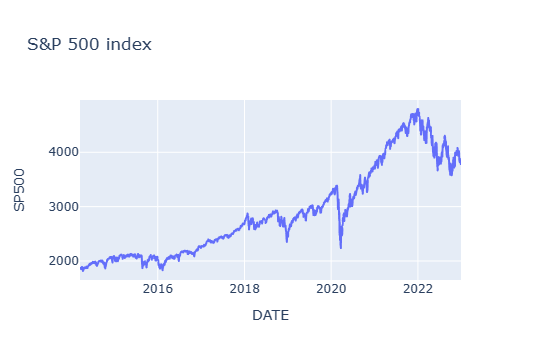

In [13]:
df_ = df.dropna()
percentag_missing = df_.isnull().sum()*100/len(df)
print('Percentage of missing data')
print('%.3f%%' % (percentag_missing))

fig = px.line(df_, y='SP500', title='S&P 500 index')
fig.show()

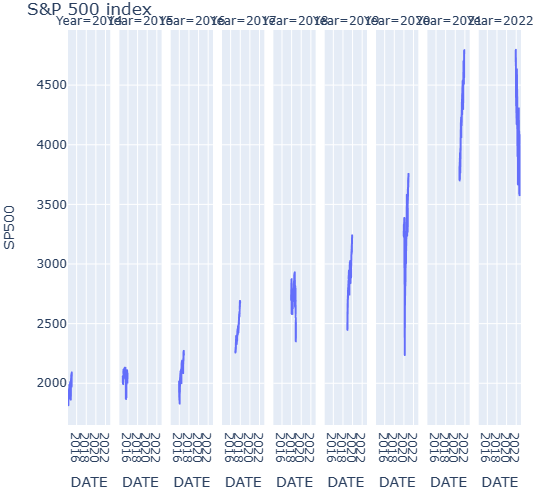

In [14]:
df_['Year'] = pd.DatetimeIndex(df_.index).year
fig = px.line(df_, y='SP500', title='S&P 500 index',
             facet_col='Year',facet_row=None)

fig.update_layout(width=700,
                 height=500,
                 margin=dict(l=20, r=20, t=30, b=20),
                 paper_bgcolor="white")
fig.show()

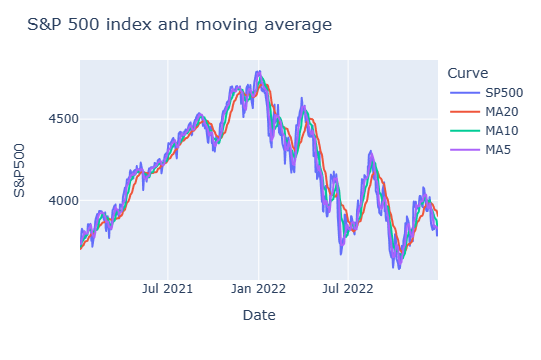

In [15]:
df_['MA20'] = df_['SP500'].rolling(20).mean()
df_['MA10'] = df_['SP500'].rolling(10).mean()
df_['MA5'] = df_['SP500'].rolling(5).mean()
df_selected = df_[['SP500','MA20','MA10','MA5']]
fig = px.line(df_selected.loc['20210101':'20221231'])
fig.update_layout(title = 'S&P 500 index and moving average',
                 xaxis_title = 'Date',
                 yaxis_title = 'S&P500',
                 legend_title = 'Curve')
fig.show()

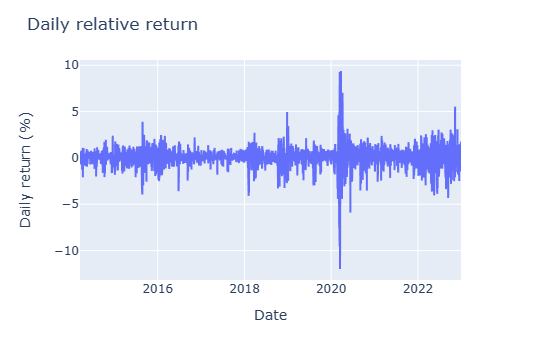

In [16]:
df_['daily_r'] = df_['SP500'].pct_change() * 100
# 计算日收益率
# 小数转为百分数
fig = px.line(df_, y = 'daily_r')
fig.update_layout(title = 'Daily relative return',
             xaxis_title = 'Date',
             yaxis_title = 'Daily return (%)',
             legend_title = 'Curve')
fig.show()

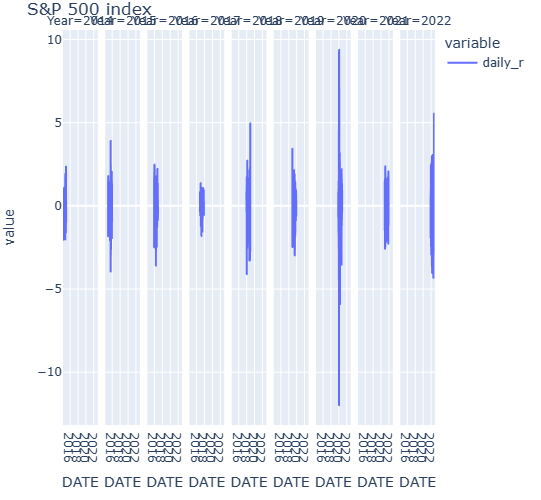

In [17]:
fig = px.line(df_,y = ['daily_r'], title = 'S&P 500 index',
 facet_col='Year', facet_row=None)
fig.update_layout(
             width=700,
             height=500,
             margin=dict(l=20, r=20, t=30, b=20),
             paper_bgcolor="white")
fig.show()

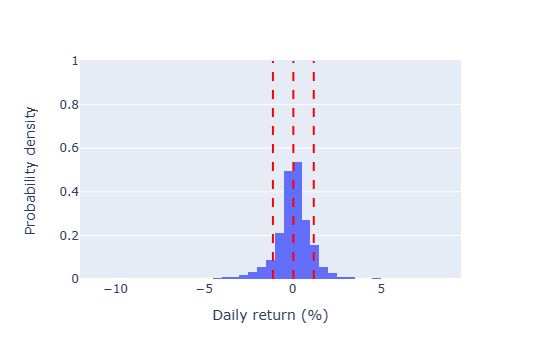

In [18]:
mean = np.mean(df_['daily_r'])
std = np.std(df_['daily_r'])
# 绘制直方图
fig = px.histogram(df_['daily_r'], nbins=50,
 histnorm='probability density')
# 标注均值和均值加减标准差的位置
fig.add_shape(type='line', x0=mean, y0=0,
 x1=mean, y1=1,
 line=dict(color='red', dash='dash'),
 name='mean')
fig.add_shape(type='line', x0=mean+std, y0=0,
 x1=mean+std, y1=1,
 line=dict(color='red', dash='dash'),
 name='mean+std')
fig.add_shape(type='line', x0=mean-std, y0=0,
 x1=mean-std, y1=1,
 line=dict(color='red', dash='dash'),
 name='mean-std')
# 设置图形布局
fig.update_layout(showlegend=False,
 xaxis_title = 'Daily return (%)',
 yaxis_title = 'Probability density')
# 显示图形
fig.show()

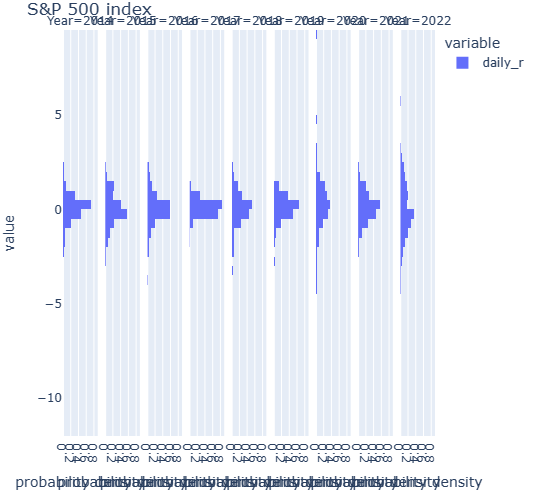

In [19]:
fig = px.histogram(df_[['daily_r','Year']], nbins=80,
 histnorm='probability density',
 title = 'S&P 500 index',
 orientation='h',
 facet_col='Year', facet_row=None)
fig.update_layout(
 width=1200,
 height=500,
 margin=dict(l=20, r=20, t=30, b=20),
 paper_bgcolor="white")
fig.update_xaxes(matches='x')
fig.show()

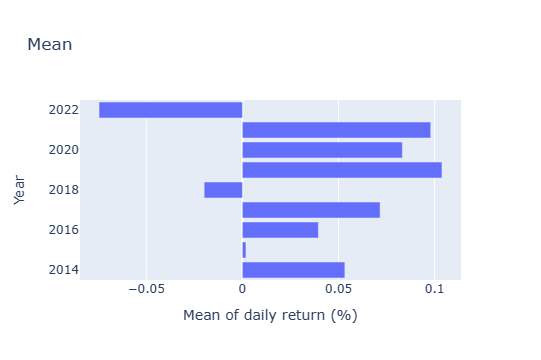

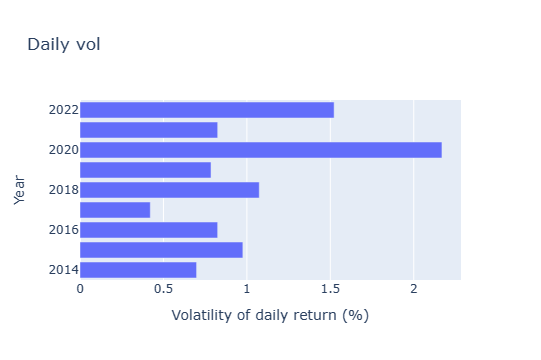

In [20]:
Yearly_stats_df = df_.groupby(['Year'], 
 as_index=False).agg({'daily_r':['mean','std']})
# 使用plotly.express绘制条形图
fig = px.bar(y=Yearly_stats_df['Year'],
 x=Yearly_stats_df['daily_r']['mean'],
 title='Mean', orientation='h')
# 设置图形布局
fig.update_layout(showlegend=False,
 xaxis_title = 'Mean of daily return (%)',
 yaxis_title = 'Year')
# 显示图形
fig.show()
 # 使用plotly.express绘制条形图
fig = px.bar(y=Yearly_stats_df['Year'],
 x=Yearly_stats_df['daily_r']['std'],
 title='Daily vol',
 orientation='h')
# 设置图形布局
fig.update_layout(showlegend=False,
 xaxis_title = 'Volatility of daily return (%)',
 yaxis_title = 'Year')
# 显示图形
fig.show()

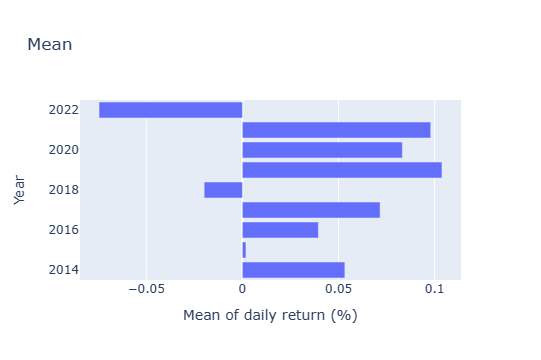

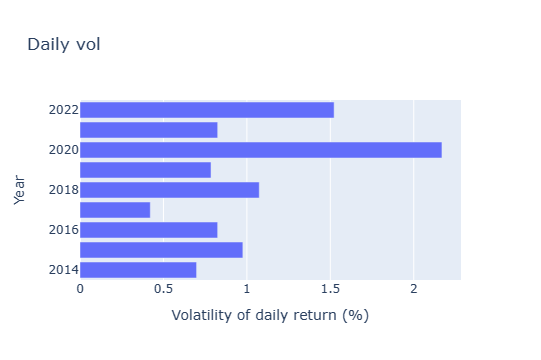

In [21]:
Yearly_stats_df = df_.groupby(['Year'], 
 as_index=False).agg({'daily_r':['mean','std']})
# 使用plotly.express绘制条形图
fig = px.bar(y=Yearly_stats_df['Year'],
 x=Yearly_stats_df['daily_r']['mean'],
 title='Mean', orientation='h')
# 设置图形布局
fig.update_layout(showlegend=False,
 xaxis_title = 'Mean of daily return (%)',
 yaxis_title = 'Year')
# 显示图形
fig.show()
 # 使用plotly.express绘制条形图
fig = px.bar(y=Yearly_stats_df['Year'],
 x=Yearly_stats_df['daily_r']['std'],
 title='Daily vol',
 orientation='h')
# 设置图形布局
fig.update_layout(showlegend=False,
 xaxis_title = 'Volatility of daily return (%)',
 yaxis_title = 'Year')
# 显示图形
fig.show()

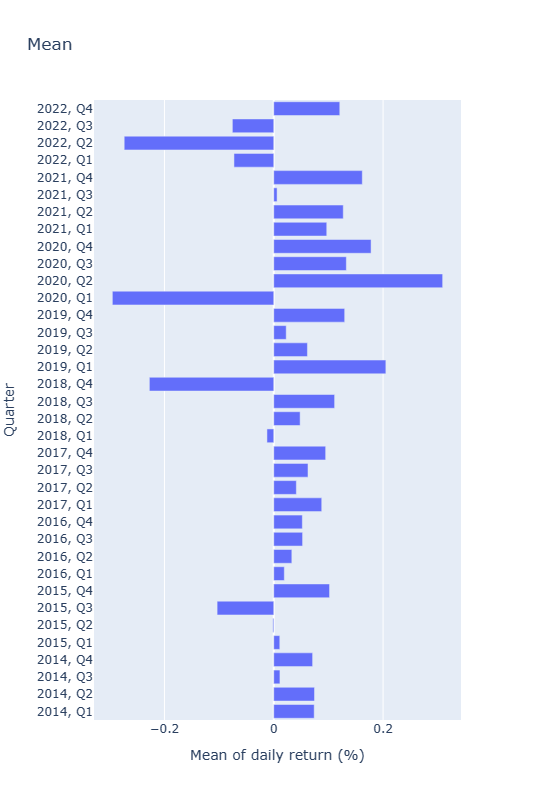

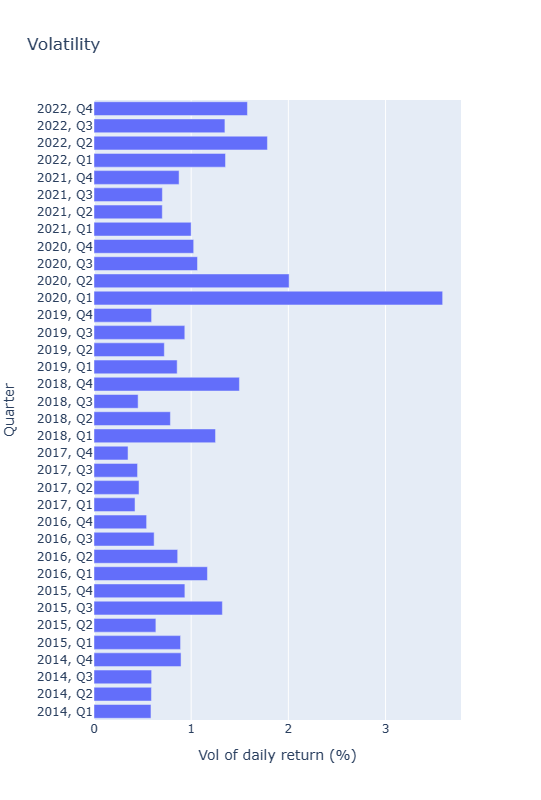

In [22]:
quarters = df_.index.quarter
years = df_.index.year
# 将季度和年份信息组合成字符串
quarter_yr = [f"{year}, Q{quarter}"
 for year, quarter in zip(years, quarters)]
# 添加新列
df_['quarter_yr'] = quarter_yr
Qly_stats_df = df_.groupby(['quarter_yr'],
 as_index=False).agg({'daily_r':['mean','std']})
# 使用plotly.express绘制条形图
fig = px.bar(y=Qly_stats_df['quarter_yr'],
 x=Qly_stats_df['daily_r']['mean'],
 title='Mean',
 orientation='h')
# 设置图形布局
fig.update_layout(showlegend=False,
 width = 600,
 height = 800,
 xaxis_title = 'Mean of daily return (%)',
 yaxis_title = 'Quarter')
fig.show()
# 使用plotly.express绘制条形图
fig = px.bar(y=Qly_stats_df['quarter_yr'],
 x=Qly_stats_df['daily_r']['std'],
 title='Volatility',
 orientation='h')
# 设置图形布局
fig.update_layout(showlegend=False,
 width = 600,
 height = 800,
 xaxis_title = 'Vol of daily return (%)',
 yaxis_title = 'Quarter')
fig.show()

C:\Users\Administrator\CLionProjects\iris-book1\venv\lib\site-packages\joypy\joyplot.py:435: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



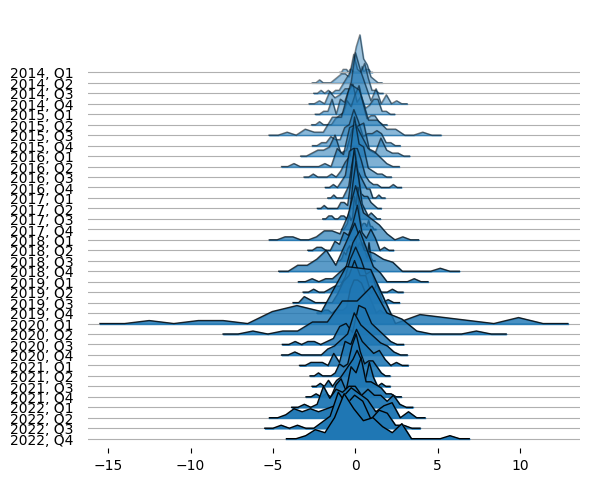

NameError: name 'cm' is not defined

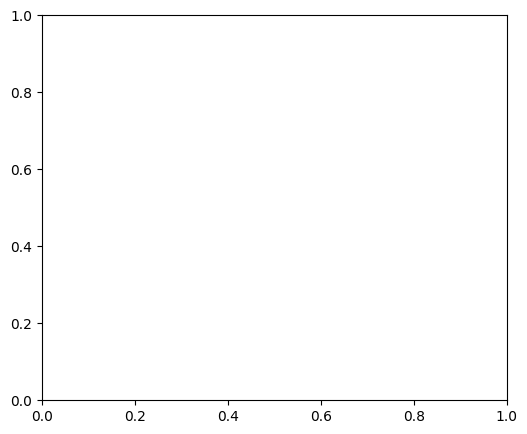

In [23]:
fig, ax = plt.subplots(figsize = (6,5))
joypy.joyplot(df_, by="quarter_yr", ax = ax,
 column="daily_r", range_style='own',
 grid="y", linewidth=1, legend=False,
 fade=True,kind="counts", bins=20)
plt.show()
# KDE
fig, ax = plt.subplots(figsize = (6,5))
joypy.joyplot(df_, by="quarter_yr", column="daily_r", ax = ax,
 range_style='own', grid="y",
 linewidth=1, legend=False,
 colormap=cm.autumn_r, fade=True)
plt.show()

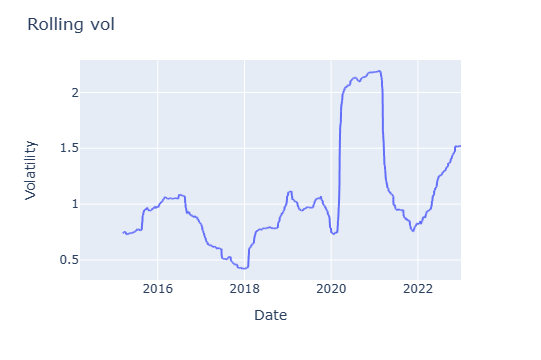

In [24]:
df_vol = df_['daily_r'].rolling(250).std()
fig = px.line(df_vol, y = 'daily_r')
fig.update_layout(title = 'Rolling vol',
 xaxis_title = 'Date',
 yaxis_title = 'Volatility')
fig.show()

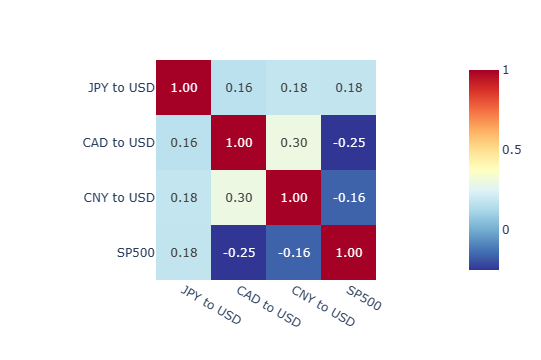

In [25]:
ticker_list = ['DEXJPUS','DEXCAUS','DEXCHUS','SP500']
df_FX_SP500 = pdr.DataReader(ticker_list,
 'fred',
 start_date,
 end_date)
# 备份数据
df_FX_SP500.to_csv('FX_SP500_' + str(start_date.date()) + '_'
 + str(end_date.date()) + '.csv')
df_FX_SP500.to_pickle('FX_SP500_' + str(start_date.date()) + '_'
 + str(end_date.date()) + '.pkl')
# 修改column names
df_FX_SP500 = df_FX_SP500.rename(columns={'DEXJPUS': 'JPY to USD',
 'DEXCAUS': 'CAD to USD',
 'DEXCHUS':'CNY to USD'})
df_FX_SP500_return = df_FX_SP500.dropna().pct_change()
# 相关性矩阵热图
fig = px.imshow(df_FX_SP500_return.corr(),
 text_auto = '.2f',
 color_continuous_scale = 'RdYlBu_r')
fig.show()

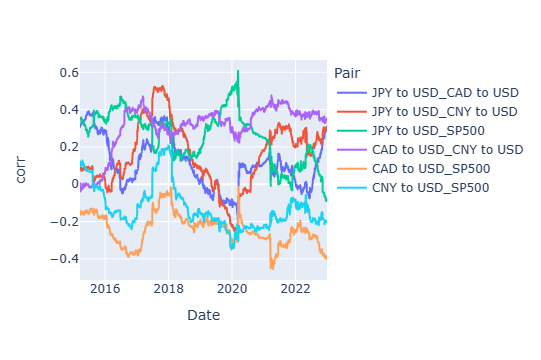

In [26]:
df_roll_corr = df_FX_SP500_return.rolling(250).corr().dropna()
# 整理数据
df_roll_corr_ = df_roll_corr.unstack()
df_roll_corr_.columns = ['_'.join(col)
 for col in
 df_roll_corr.unstack().columns.values]
df_roll_corr_ = df_roll_corr_.dropna()
# 保留成对相关性数据
from itertools import combinations
list_tickers = list(df_FX_SP500_return.columns)
pairs_kept = ['_'.join(combo)
 for combo in combinations(list_tickers,2)]
df_roll_corr_ = df_roll_corr_[pairs_kept]
# 可视化
fig = px.line(df_roll_corr_)
fig.update_layout(xaxis_title = 'Date',
 yaxis_title = 'corr',
 legend_title = 'Pair')
fig.show()
